In [1]:
# import 
import sys
sys.path.insert(0, '/project')

from DenoisingConvolutionalAutoEncoder import DenoisingConvolutionalAutoEncoder
from ConvolutionalAutoEncoder import ConvolutionalAutoEncoder


cae = ConvolutionalAutoEncoder()
cae.train_from_dataset(epochs=30)

Using TensorFlow backend.


Train on 230259 samples, validate on 25585 samples
Epoch 1/30
230259/230259 [==============================] - 70s - loss: 0.0279 - val_loss: 0.0242
Epoch 2/30
230259/230259 [==============================] - 69s - loss: 0.0134 - val_loss: 0.0109
Epoch 3/30
230259/230259 [==============================] - 67s - loss: 0.0098 - val_loss: 0.0060
Epoch 4/30
230259/230259 [==============================] - 69s - loss: 0.0078 - val_loss: 0.0053
Epoch 5/30
230259/230259 [==============================] - 68s - loss: 0.0068 - val_loss: 0.0061
Epoch 6/30
230259/230259 [==============================] - 68s - loss: 0.0059 - val_loss: 0.0091
Epoch 7/30
230259/230259 [==============================] - 68s - loss: 0.0054 - val_loss: 0.0039
Epoch 8/30
230259/230259 [==============================] - 68s - loss: 0.0049 - val_loss: 0.0036
Epoch 9/30
230259/230259 [==============================] - 68s - loss: 0.0047 - val_loss: 0.0035
Epoch 10/30
230259/230259 [==============================] - 68s - 

In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

h5_file = '/data/pgram_norm.hdf5'
data = []
with h5py.File(h5_file) as f:
    data = np.array(f['data'])

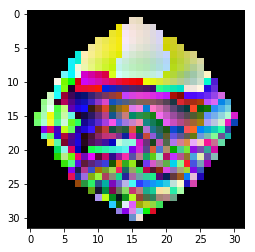

In [3]:
%matplotlib inline 
data1 = np.rollaxis(data,2,5)
plt.imshow(data1[5][0])

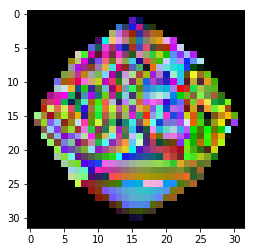

In [4]:
data2 = data1.reshape((data1.shape[0]*data1.shape[1], 32, 32, 3))
plt.imshow(data2[0])

In [5]:
m = cae.Model
preds = m.predict(data2[0:32])

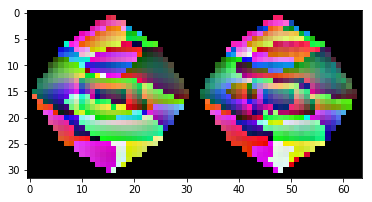

In [12]:
mask = np.load('/project/mask.npy')
plt.imshow(np.concatenate((data2[5], preds[5]*mask), axis=1))

In [40]:
copydata = data2[0]
copydata[copydata.nonzero()]=1.0
print(copydata)
np.save('mask.npy', copydata)
#print(copydata[0][:][3])

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ..., 
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
